# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import statsmodels.api as sm
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import scipy.stats as stats
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingClassifier
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm
import feature_engine.missing_data_imputers as mdi

## Importing the Data:

In [ ]:
Data=pd.read_csv("equip_failures_training_set.csv")
print(Data.shape)

(60000, 172)


## Overview of the Data:

In [ ]:
Data

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59996,0,153002,na,664,186,0,0,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,4880368,0,280,0,1224,2114,8913782,7998174,1929126,776370,2,0,0,0,3328,1080,0,0,0,0,0,45114,...,0,1872932,4936,1600,0,0,0,0,0,0,0,0,62846,137050,27546,0,0,265640,54496,470800,293652,0,0,0,0,80125300,2912.04,2858,1608808,1479066,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,59997,0,2286,na,2130706538,224,0,0,0,0,0,0,104,99186,36564,128,0,0,56982,0,0,0,0,0,123604,108768,24020,11622,0,0,0,0,192,56,0,0,0,0,0,4610,...,10,

In [ ]:
Data.describe()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
count,60000.000000,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.935500e+04,5.937100e+04,5.937100e+04,5.560000e+04,5.935800e+04,5.937100e+04,5.935800e+04,5.941100e+04,5.935800e+04,5.941100e+04,57277.000000,5.937100e+04,5.937100e+04,5.937100e+04,57500.000000,57499.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,46192.000000,4.619200e+04,57497.000000,57276.000000,5.599200e+04,5.599200e+04,5.599200e+04,5.599400e+04,55993.000000,5.599300e+04,5.599200e+04,5.599100e+04,5.930900e+04,5.727600e+04,57274.000000,5.727400e+04,5.727400e+04,5.727300e+04,57273.000000,5.727400e+04,5.727400e+04,5.727700e+04,5.727600e+04,57277.000000,57277.000000,5.599300e+04,49761.000000,50447.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,30000.500000,0.016667,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,1.108374e+06,1.657818e+06,4.993098e+05,3.556989e+04,5.114753e+03,1.809931e+06,9.016965e+03,1.143675e+03,9.794900e+02,5.913048e+04,9.328133e+04,3.461037e+06,3.002440e+06,1.004160e+06,4.424045e+05,0.496918,1.267365e+02,5.072046e+03,2.305804e+02,1117.825913,374.327380,1.221165e+04,1.019012e+04,1.097500e+04,7.225784e+03,1.056600e+04,1.119791e+05,...,13.416652,2.200752e+06,3123.961911,375.147112,2.718638e+03,5.609957e+03,4.707073e+03,3.724824e+04,39.938564,1.861313e+03,2.854177e+04,7.923228e+03,3.374545e+04,2.850785e+04,6958.652722,4.529375e+06,2.037598e+05,8.965500e+04,15403.354670,4.058712e+06,5.938350e+05,7.912085e+05,7.780350e+03,0.215759,1.567750,9.717093e+06,1353.131452,1452.155212,7.334042e+05,7.838746e+05,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,17320.652413,0.128020,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,2.374282e+06,3.262607e+06,3.909384e+06,1.422765e+06,2.201524e+05,1.696582e+05,4.185740e+06,1.632778e+05,5.035971e+04,7.583162e+04,5.394658e+05,8.494694e+05,7.790350e+06,6.819518e+06,3.088457e+06,1.262469e+06,5.511653,1.101004e+04,1.196159e+05,1.579952e+04,6598.611557,1482.711621,4

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 172 entries, id to sensor107_measure
dtypes: int64(3), object(169)
memory usage: 78.7+ MB


## Observation:




1. The difference between mean and median is not insignificant for some features hence we can say that there might be few outliers in the data.
2. There are many NULL values in the Data.
3. Many columns are of the type object which have to be converted into type float
4. "na" has to be converted to np.NaN for us to perform Analysis on the Dataset






In [ ]:
Data=Data.replace('na',np.NaN)
Data=Data.astype(float)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 172 entries, id to sensor107_measure
dtypes: float64(172)
memory usage: 78.7 MB


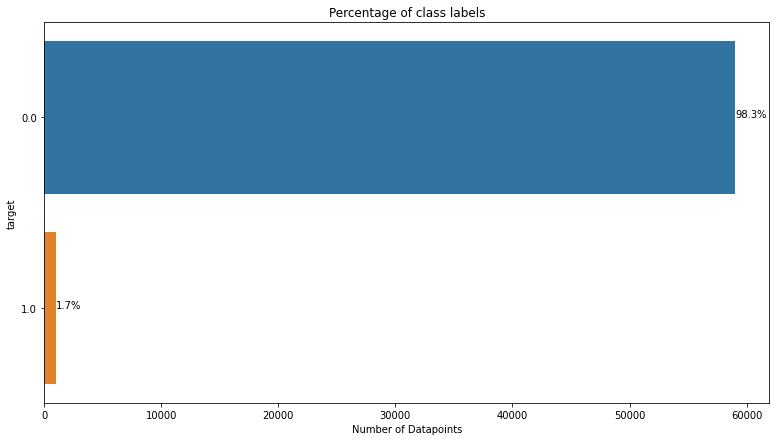

In [ ]:
plt.figure(figsize=(13,7))
ax=sns.countplot(y='target',data=Data)
plt.title('Percentage of class labels')
plt.xlabel('Number of Datapoints')

total = len(Data['target'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_width()/total)
  x = p.get_x() + p.get_width() + 0.02
  y = p.get_y() + p.get_height()/2
  ax.annotate(percentage, (x, y))

plt.show()

In [ ]:
label_0=0
label_1=0
for i in Data['target']:
  if i==0:
    label_0+=1
  else:
    label_1+=1
print("There are {} labels for the class 0".format(label_0))
print("There are {} labels for the class 1".format(label_1))


There are 59000 labels for the class 0
There are 1000 labels for the class 1




1.   The Dataset is highly imbalanced which implies that Accuracy metric cannot be used to decide the performance of the model
2.   Using F1 score would be the best option given the imbalance



## Distribution of NULL values across various features:

In [ ]:
Data.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1.0,0.0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,2.0,0.0,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,3.0,0.0,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,4.0,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,5.0,0.0,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [ ]:
for i in Data.columns:
  if i!='id' and i!='target':
    print("The column {} has {} percentage of its values as NULL".format(i,Data[i].isnull().sum() / Data.shape[0] * 100.00))

The column sensor1_measure has 0.0 percentage of its values as NULL
The column sensor2_measure has 77.215 percentage of its values as NULL
The column sensor3_measure has 5.558333333333334 percentage of its values as NULL
The column sensor4_measure has 24.768333333333334 percentage of its values as NULL
The column sensor5_measure has 4.166666666666666 percentage of its values as NULL
The column sensor6_measure has 4.166666666666666 percentage of its values as NULL
The column sensor7_histogram_bin0 has 1.1183333333333334 percentage of its values as NULL
The column sensor7_histogram_bin1 has 1.1183333333333334 percentage of its values as NULL
The column sensor7_histogram_bin2 has 1.1183333333333334 percentage of its values as NULL
The column sensor7_histogram_bin3 has 1.1183333333333334 percentage of its values as NULL
The column sensor7_histogram_bin4 has 1.1183333333333334 percentage of its values as NULL
The column sensor7_histogram_bin5 has 1.1183333333333334 percentage of its values 

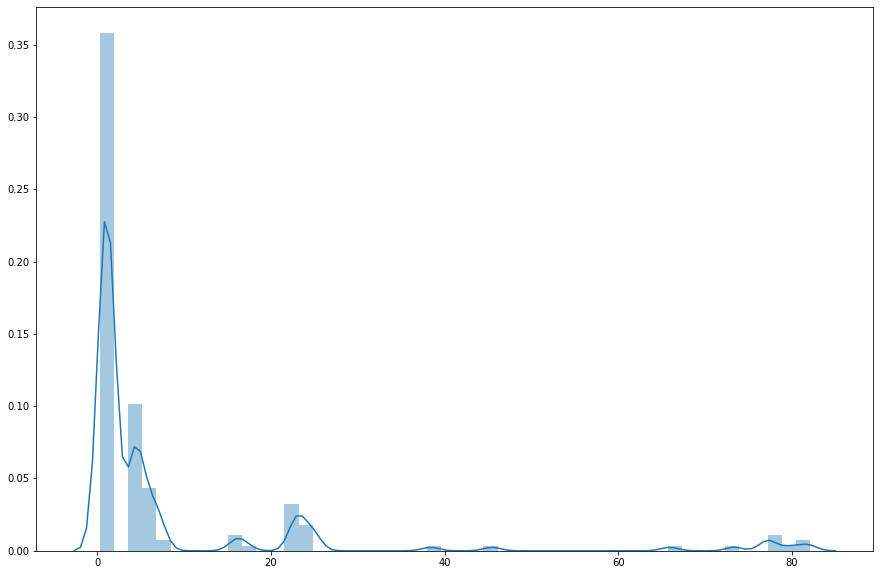

In [ ]:
plt.figure(figsize=(15,10))
x=Data[Data.columns[Data.isnull().any()]].isnull().sum() * 100 / Data.shape[0]
sns.distplot(x,kde=True)

## Observation:




*   For most of the features the percentage of NULL values are in the range of 0 to 20 percentage of their data

*   A very small majority of the features have NULL values in the percentage of 50 to 80 of their own data.
*   These features might be redundant or do not have much information which might contribute towards the training of the model.


*   Those features can be dropped during the data preprocessing stage.



## UNIVARIATE ANALYSIS:

In [ ]:
minimum_value=[]
maximum_value=[]
number_of_zeroes=[]
number_of_null_values=[]
for i in Data.columns:
  if i!='id' and i!='target':
    minimum_value.append(Data[i].min(skipna=True)) #FINDING THE MINIMUM AND MAXIMUM VALUE OF EACH FEATURE
    maximum_value.append(Data[i].max(skipna=True))
    number_of_zeroes.append((Data[i] == 0).sum(axis=0))
    number_of_null_values.append((Data[i].isnull()).sum(axis=0))

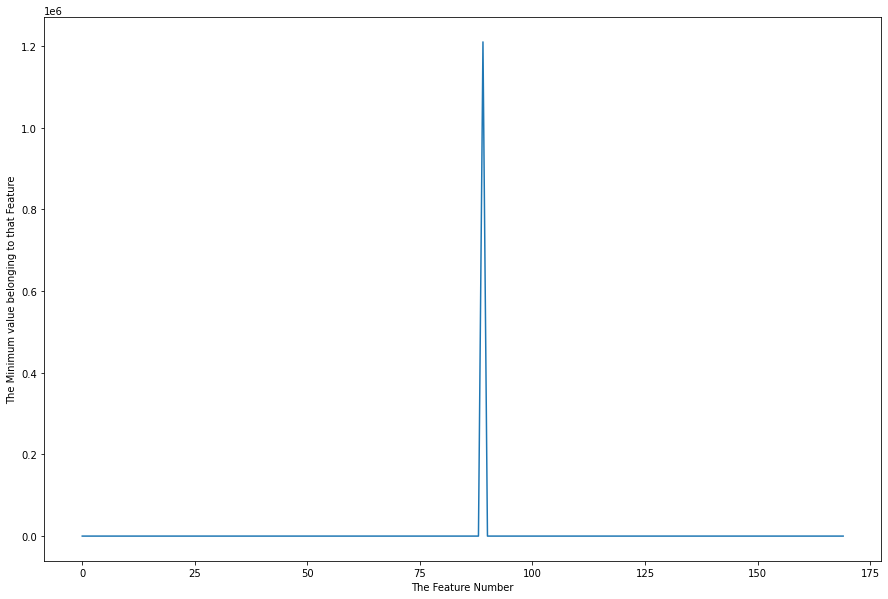

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('The Feature Number')
plt.ylabel('The Minimum value belonging to that Feature')
plt.plot(range(0,170),minimum_value)

In [ ]:
for i,j in enumerate(minimum_value):
  if j>0:
    print("The {} feature has a minimum value of {} which is greater than 0".format(Data.columns[i+2],j))


The sensor48_measure feature has a minimum value of 172.0 which is greater than 0
The sensor54_measure feature has a minimum value of 1209600.0 which is greater than 0


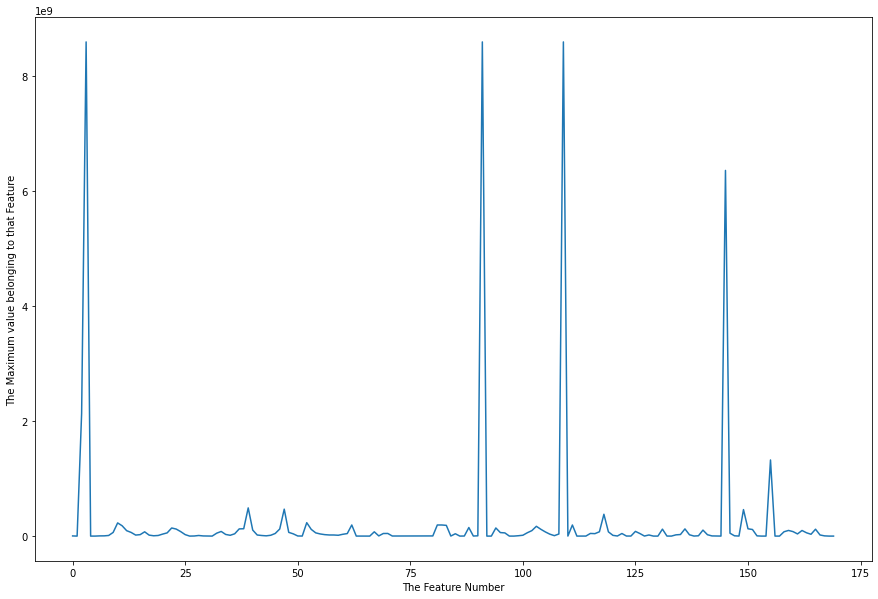

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('The Feature Number')
plt.ylabel('The Maximum value belonging to that Feature')
plt.plot(range(0,170),maximum_value)



*   Most of the minimum values are 0
*   Maximum value varies from feature to feature







###Analysis on the features which have their minimum value greater than 0

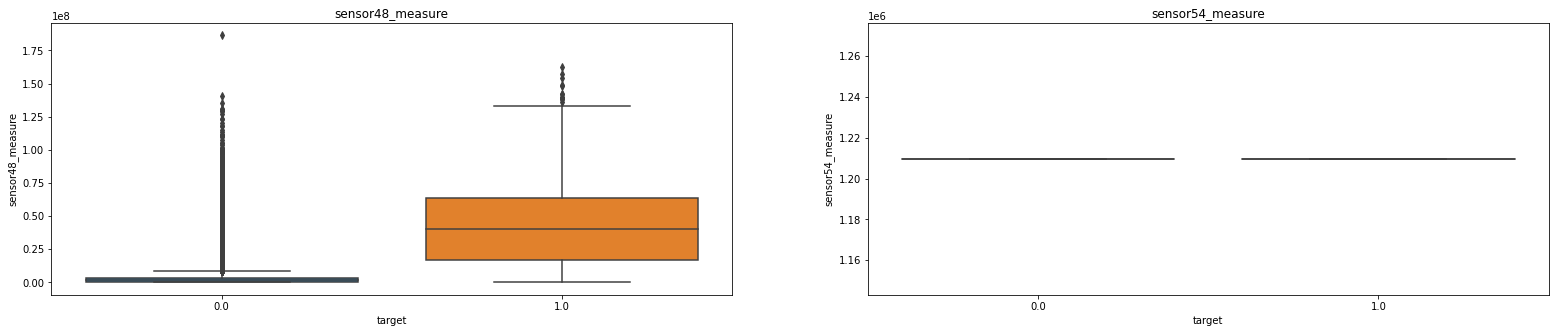

In [ ]:
histograms=['sensor48_measure','sensor54_measure']
fig=plt.figure(figsize=(100,5))
for i,j in enumerate(histograms):
  fig.add_subplot(1,7,i+1)
  ax=sns.boxplot(x=Data['target'],y=Data[j])
  plt.title(j)
plt.show()

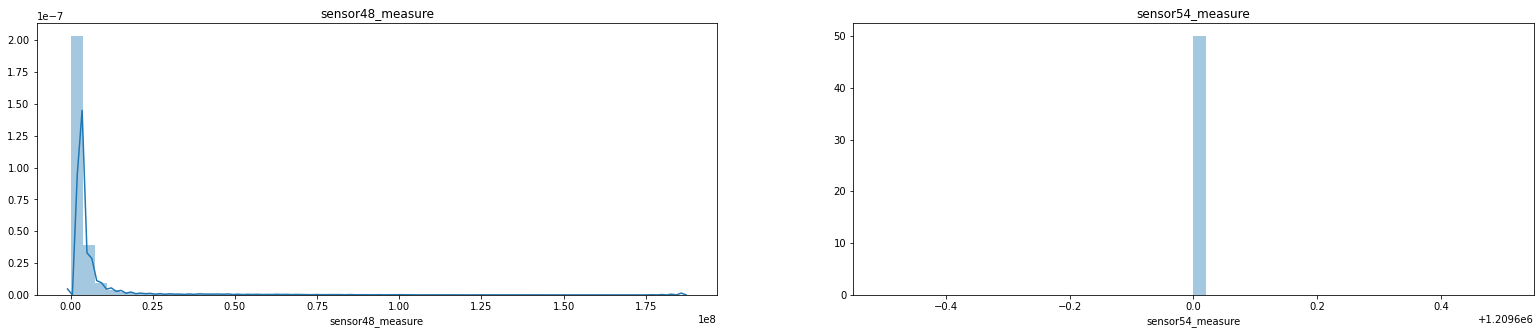

In [ ]:
fig=plt.figure(figsize=(100,5))
for i,j in enumerate(histograms):
  fig.add_subplot(1,7,i+1)
  ax=sns.distplot(Data[j],kde=True)
  plt.title(j)
plt.show()

In [ ]:
print("The number of unique Data points in sensor54_measure are ",len(Data['sensor54_measure'].unique()))
print("The number of unique Data points in sensor48_measure are ",len(Data['sensor48_measure'].unique()))

The number of unique Data points in sensor54_measure are  2
The number of unique Data points in sensor48_measure are  52849


In [ ]:
print("Maximum value of sensor54_measure is ",np.max(Data['sensor54_measure']))
print("Minimum value of sensor54_measure is ",np.min(Data['sensor54_measure']))
print("The unique values of sensor54_measure are ",Data['sensor54_measure'].unique())

Maximum value of sensor54_measure is  1209600.0
Minimum value of sensor54_measure is  1209600.0
The unique values of sensor54_measure are  [1209600.      nan]


###Observations:

*   Sensor48_measure is able to classify the data points well for the minority class which is class 1 with very few outliers but doesnt do a good job for class 0. It is right skewed.
*   Sensor54_measure isnt able to distinguish between class 0 and 1  for any of its datapoints. After checking through its maximum and minimum value we can observe that there are only two unique values in that feature i.e 12609600 and Nan

* We can conclude that sensor54_measure does not give an valuable information as it is same for all the datapoints and the remaining values are null.
* Hence Sensor54_measure can be discarded.





## Analysis of features with a maximum value beyond a given threshold

In [ ]:
print(sorted(maximum_value)[::-1][0:30])

[8584297742.0, 8584297742.0, 8584297736.0, 6351872864.0, 2130706796.0, 1322456920.0, 489678156.0, 467832334.0, 460207620.0, 379142116.0, 232871714.0, 228830570.0, 192871534.0, 192871534.0, 192871534.0, 192871534.0, 186353854.0, 179187978.0, 169869316.0, 148615188.0, 140986129.9, 140861830.0, 127680326.0, 127034534.0, 124948914.0, 124700880.0, 123047106.0, 122201822.0, 120759484.0, 119580108.0]


In [ ]:
max_check=[]
for i,j in enumerate(maximum_value):
  if j>=186353854.0: ##checking features with a maximum value greater than 186353854 by randomly setting a threshold which is not too small
    print("The {} feature has a maximum value of {}".format(Data.columns[i+2],j))
    max_check.append(Data.columns[i+2])

The sensor3_measure feature has a maximum value of 2130706796.0
The sensor4_measure feature has a maximum value of 8584297742.0
The sensor7_histogram_bin4 feature has a maximum value of 228830570.0
The sensor24_histogram_bin7 feature has a maximum value of 489678156.0
The sensor25_histogram_bin5 feature has a maximum value of 467832334.0
The sensor26_histogram_bin0 feature has a maximum value of 232871714.0
The sensor27_measure feature has a maximum value of 192871534.0
The sensor46_measure feature has a maximum value of 192871534.0
The sensor47_measure feature has a maximum value of 192871534.0
The sensor48_measure feature has a maximum value of 186353854.0
The sensor56_measure feature has a maximum value of 8584297736.0
The sensor65_measure feature has a maximum value of 8584297742.0
The sensor67_measure feature has a maximum value of 192871534.0
The sensor69_histogram_bin5 feature has a maximum value of 379142116.0
The sensor92_measure feature has a maximum value of 6351872864.0
The

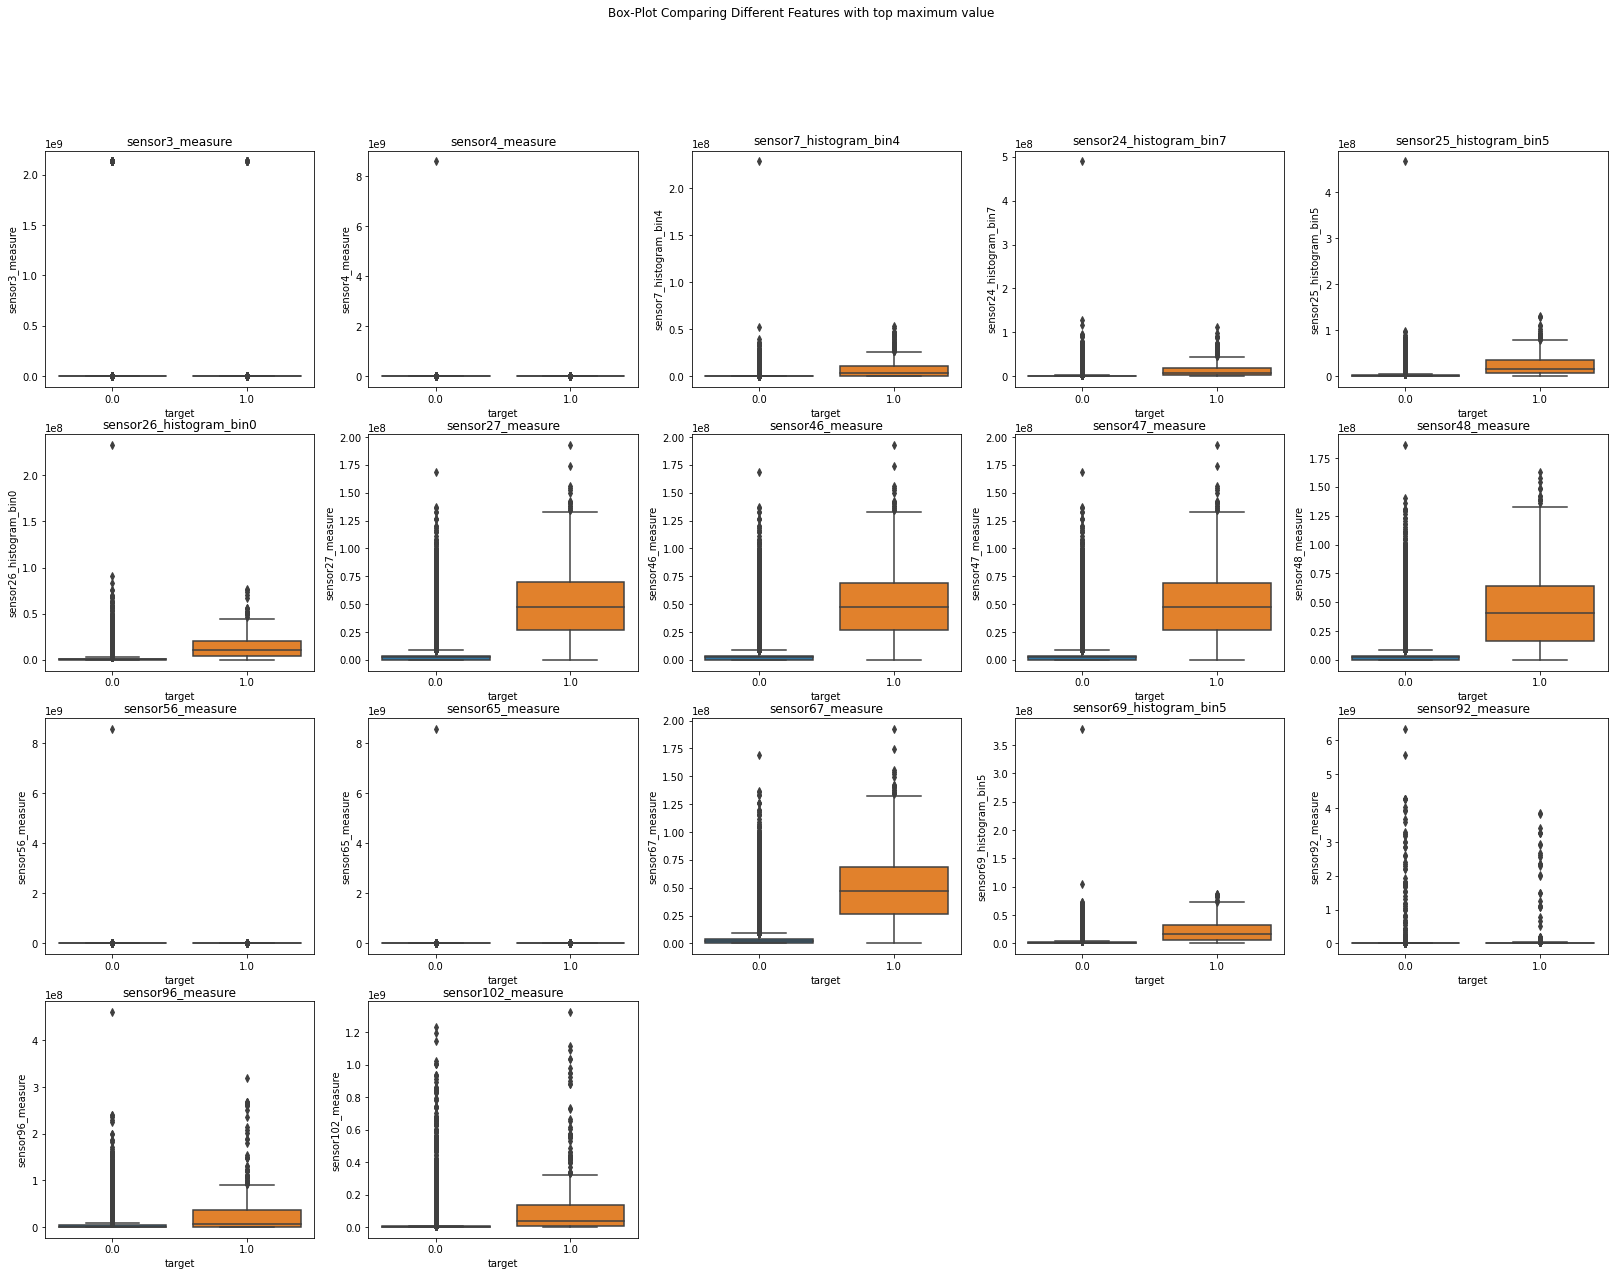

In [ ]:
fig=plt.figure(figsize=(28,20))
for i,j in enumerate(max_check):
  fig.add_subplot(4,5,i+1)
  ax=sns.boxplot(x=Data['target'],y=Data[j])
  plt.title(j)
plt.suptitle("Box-Plot Comparing Different Features with top maximum value")
plt.show()

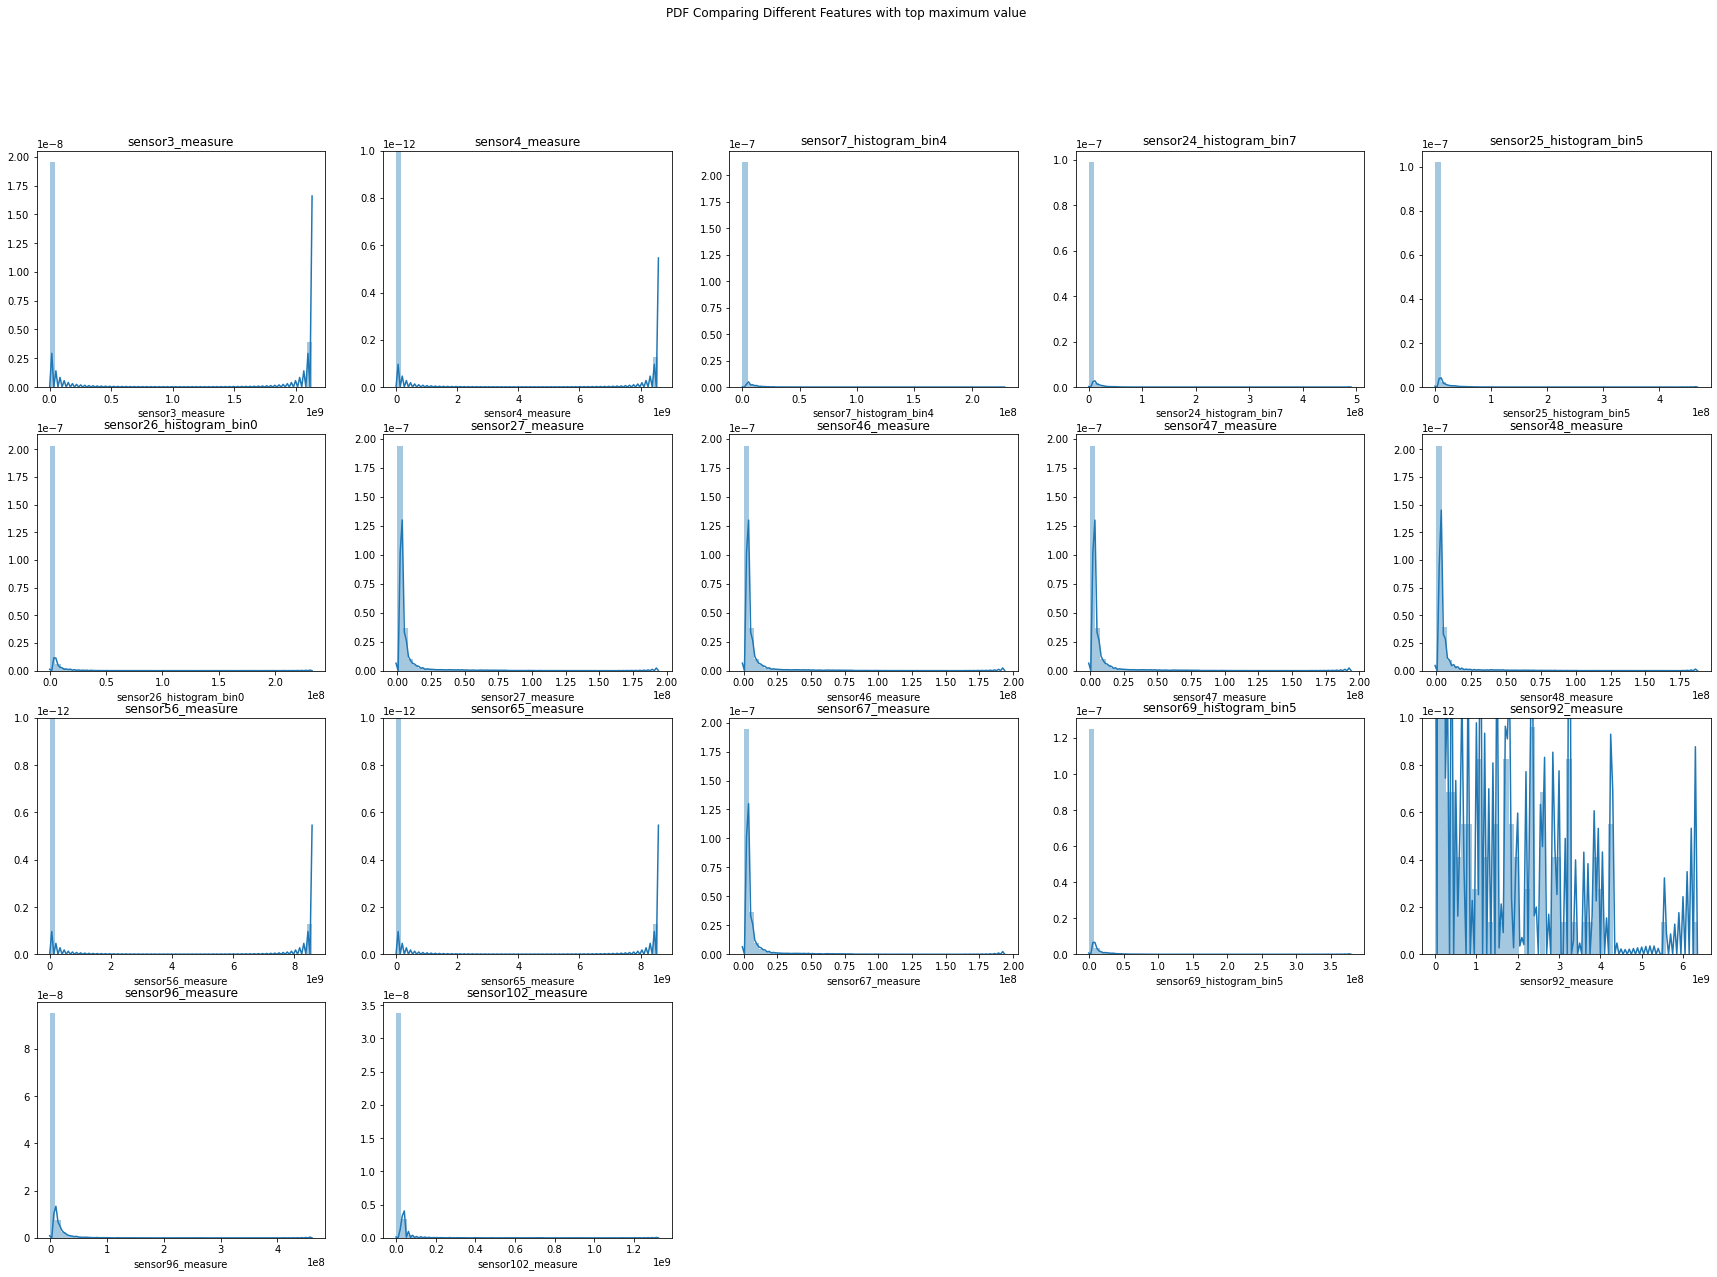

In [ ]:
fig=plt.figure(figsize=(30,20))
for i,j in enumerate(max_check):
  fig.add_subplot(4,5,i+1)
  ax=sns.distplot(Data[j],kde=True)
  plt.title(j)
  if i==16:
    break
plt.suptitle("PDF Comparing Different Features with top maximum value")
plt.show()

In [ ]:
Data['sensor92_measure'].describe()

count    5.727400e+04
mean     4.529375e+06
std      9.748478e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.351873e+09
Name: sensor92_measure, dtype: float64

### Observations:

*  The features with highest maximum values for the given threshold are able to classify most of the datapoints well for class 1 with minimal outliers but do not do the same for class 0
* Most of the features which are present are in the form of sensor(n) and sensor(n+1) . Example - Sensor47_measure and sensor48_measure are having maximum value beyond the given threshold
* This might imply that the these sensors might be placed at the same place or nearby each other hence the readings are similar. Hence they might be correlated features.
* Most of the features are right skewed except for sensor92_measure

* The feature sensor92_measure has a lot of variability among its datapoints . The mean and median vary alot which might mean that the feature might be affected my outliers



